In [47]:
import pandas as pd
#import modin.pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import math
pd.set_option('display.max_columns', None)

In [48]:
#df = pd.read_csv('2021_public_lar.csv',chunksize=10)
df = pd.read_csv('2021_public_lar.csv',usecols=['state_code','derived_loan_product_type','derived_dwelling_category'
                                                ,'derived_race','applicant_race_1','derived_sex','action_taken',
                                                'loan_purpose','business_or_commercial_purpose',
                                                'loan_amount','combined_loan_to_value_ratio','interest_rate',
                                                'loan_term','property_value','occupancy_type','income',
                                                'debt_to_income_ratio','applicant_credit_score_type','denial_reason_1'])

C:\Users\josep\AppData\Local\Temp\ipykernel_25492\1617420616.py:2: DtypeWarning: Columns (22,23,31,38,46) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('2021_public_lar.csv',usecols=['state_code','derived_loan_product_type','derived_dwelling_category'


In [49]:
df.head(10)

,state_code,derived_loan_product_type,derived_dwelling_category,derived_race,derived_sex,action_taken,loan_purpose,business_or_commercial_purpose,loan_amount,combined_loan_to_value_ratio,interest_rate,loan_term,property_value,occupancy_type,income,debt_to_income_ratio,applicant_credit_score_type,applicant_race_1,denial_reason_1
0,NY,Conventional:First Lien,Single Family (1-4 Units):Site-Built,White,Male,2,1,2,425000,51.829,3.0,360,825000,1,159.0,46,2,5.0,10
1,NY,Conventional:First Lien,Single Family (1-4 Units):Site-Built,White,Male,1,1,2,95000,95.0,2.875,360,105000,1,35.0,39,2,5.0,10
2,NY,Conventional:First Lien,Single Family (1-4 Units):Site-Built,White,Male,1,1,2,95000,96.999,3.125,360,95000,1,24.0,38,3,5.0,10
3,NY,Conventional:First Lien,Single Family (1-4 Units):Site-Built,White,Male,4,31,1,125000,NaN,NaN,180,NaN,3,141.0,NaN,9,5.0,10
4,NY,Conventional:First Lien,Single Family (1-4 Units):Site-Built,White,Male,1,1,2,105000,90.0,3.125,360,115000,1,80.0,<20%,1,5.0,10
5,NY,Conventional:First Lien,Single Family (1-4 Units):Site-Built,White,Joint,5,32,2,105000,NaN,NaN,240,NaN,1,35.0,NaN,9,5.0,10
6,NY,Conventional:First Lien,Single Family (1-4 Units):Site-Built,White,Joint,1,2,2,115000,30.556,3.625,180,365000,1,67.0,42,1,5.0,10
7,NY,Conventional:First Lien,Single Family (1-4 Units):Site-Built,White,Female,1,31,2,65000,38.961,3.5,180,155000,1,63.0,37,3,5.0,10
8,NY,Conventional:First Lien,Single Family (1-4 Units):Site-Built,White,Joint,1,31,2,55000,27.174,2.0,360,185000,1,75.0,20%-<30%,3,5.0,10
9,NY,Conventional:First Lien,Single Family (1-4 Units):Site-Built,White,Joint,1,1,2,255000,80.0,3.0,360,315000,1,68.0,36,1,5.0,10


In [50]:
len(df)

26124552

In [51]:
df.dtypes

state_code                         object
derived_loan_product_type          object
derived_dwelling_category          object
derived_race                       object
derived_sex                        object
action_taken                        int64
loan_purpose                        int64
business_or_commercial_purpose      int64
loan_amount                         int64
combined_loan_to_value_ratio       object
interest_rate                      object
loan_term                          object
property_value                     object
occupancy_type                      int64
income                            float64
debt_to_income_ratio               object
applicant_credit_score_type         int64
applicant_race_1                  float64
denial_reason_1                     int64
dtype: object

In [52]:
# Look only at NY
# conventional loan:  first lien
# home purchase
# not commercial/business
# single family home
# principle residence/Owner occupied 

df_ny = df[(df["state_code"] == 'NY')]
df_ny = df_ny[df_ny['derived_loan_product_type'] == 'Conventional:First Lien']
df_ny = df_ny.loc[df_ny['loan_purpose'].isin([1])]
df_ny = df_ny.loc[df_ny['business_or_commercial_purpose'].isin([2])]
df_ny = df_ny[df_ny['derived_dwelling_category'] == 'Single Family (1-4 Units):Site-Built']
df_ny = df_ny.loc[df_ny['occupancy_type'].isin([1])]


In [53]:
df_ny['combined_loan_to_value_ratio'] = df_ny['combined_loan_to_value_ratio'].astype(str).astype(float)
df_ny['interest_rate'] = df_ny['interest_rate'].astype(str).astype(float)

In [54]:
df_ny

,state_code,derived_loan_product_type,derived_dwelling_category,derived_race,derived_sex,action_taken,loan_purpose,business_or_commercial_purpose,loan_amount,combined_loan_to_value_ratio,interest_rate,loan_term,property_value,occupancy_type,income,debt_to_income_ratio,applicant_credit_score_type,applicant_race_1,denial_reason_1
0,NY,Conventional:First Lien,Single Family (1-4 Units):Site-Built,White,Male,2,1,2,425000,51.829,3.000,360,825000,1,159.0,46,2,5.0,10
1,NY,Conventional:First Lien,Single Family (1-4 Units):Site-Built,White,Male,1,1,2,95000,95.000,2.875,360,105000,1,35.0,39,2,5.0,10
2,NY,Conventional:First Lien,Single Family (1-4 Units):Site-Built,White,Male,1,1,2,95000,96.999,3.125,360,95000,1,24.0,38,3,5.0,10
4,NY,Conventional:First Lien,Single Family (1-4 Units):Site-Built,White,Male,1,1,2,105000,90.000,3.125,360,115000,1,80.0,<20%,1,5.0,10
9,NY,Conventional:First Lien,Single Family (1-4 Units):Site-Built,White,Joint,1,1,2,255000,80.000,3.000,360,315000,1,68.0,36,1,5.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26124546,NY,Conventional:First Lien,Single Family (1-4 Units):Site-Built,White,Joint,1,1,2,135000,80.000,3.250,360,165000.0,1,108.0,20%-<30%,2,5.0,10
26124547,NY,Conventional:First Lien,Single Family (1-4 Units):Site-Built,White,Female,1,1,2,165000,91.954,3.125,360,175000.0,1,44.0,30%-<36%,3,5.0,10
26124548,NY,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Race Not Available,Male,1,1,2,165000,97.000,2.875,360,165000.0,1,45.0,40,2,6.0,10
26124549,NY,Conventional:First Lien,Single Family (1-4 Units):Site-Built,White,Male,1,1,2,255000,99.953,3.125,360,265000.0,1,64.0,30%-<36%,1,5.0,10


In [55]:
print("Number of applicants: ", len(df_ny))

Number of applicants:  188640


In [56]:
num_applied_american_indian = df_ny['derived_race'].value_counts()['American Indian or Alaska Native']
num_applied_asian = df_ny['derived_race'].value_counts()['Asian']
num_applied_black = df_ny['derived_race'].value_counts()['Black or African American']
#num_applied_notprovided= df_ny['derived_race'].value_counts()['Not provided']
num_applied_hawaiian = df_ny['derived_race'].value_counts()['Native Hawaiian or Other Pacific Islander']
#num_applied_notapplicable= df_ny['derived_race'].value_counts()['Not applicable']
num_applied_white = df_ny['derived_race'].value_counts()['White']

print("Number of American Indian or Alaska Native applied: ",num_applied_american_indian)
print("Number of Asian applied: ",num_applied_asian)
print("Number of Black or African American applied: ",num_applied_black)
#print("Number of Not provided applied: ",num_applied_notprovided)
print("Number of Native Hawaiian or Other Pacific Islander applied: ",num_applied_hawaiian)
#print("Number of Not applicable applied: ",num_applied_notapplicable)
print("Number of Whites applied: ",num_applied_white)

Number of American Indian or Alaska Native applied:  445
Number of Asian applied:  27400
Number of Black or African American applied:  9841
Number of Native Hawaiian or Other Pacific Islander applied:  291
Number of Whites applied:  108718


In [57]:
df_ny_by_race = df_ny.groupby(by='derived_race').count()
#df_ny_by_race = df_ny_by_race['action_taken']
df_ny_by_race

,state_code,derived_loan_product_type,derived_dwelling_category,derived_sex,action_taken,loan_purpose,business_or_commercial_purpose,loan_amount,combined_loan_to_value_ratio,interest_rate,loan_term,property_value,occupancy_type,income,debt_to_income_ratio,applicant_credit_score_type,applicant_race_1,denial_reason_1
derived_race,,,,,,,,,,,,,,,,,,
2 or more minority races,247,247,247,247,247,247,247,247,198,181,246,212,247,242,199,247,247,247
American Indian or Alaska Native,445,445,445,445,445,445,445,445,355,319,445,373,445,443,358,445,445,445
Asian,27400,27400,27400,27400,27400,27400,27400,27400,22302,21448,27389,23360,27400,25568,20950,27400,27400,27400
Black or African American,9841,9841,9841,9841,9841,9841,9841,9841,7804,7242,9818,8355,9841,9757,7822,9841,9841,9841
Free Form Text Only,28,28,28,28,28,28,28,28,19,14,28,21,28,28,19,28,0,28
Joint,4404,4404,4404,4404,4404,4404,4404,4404,3541,3515,4400,3750,4404,4334,3546,4404,4404,4404
Native Hawaiian or Other Pacific Islander,291,291,291,291,291,291,291,291,241,214,290,256,291,288,238,291,291,291
Race Not Available,37266,37266,37266,37266,37266,37266,37266,37266,20831,30670,37226,32262,37266,29732,20718,37266,37266,37266
White,108718,108718,108718,108718,108718,108718,108718,108718,88431,90064,108588,96110,108718,107284,88621,108718,108718,108718


<AxesSubplot: ylabel='action_taken'>

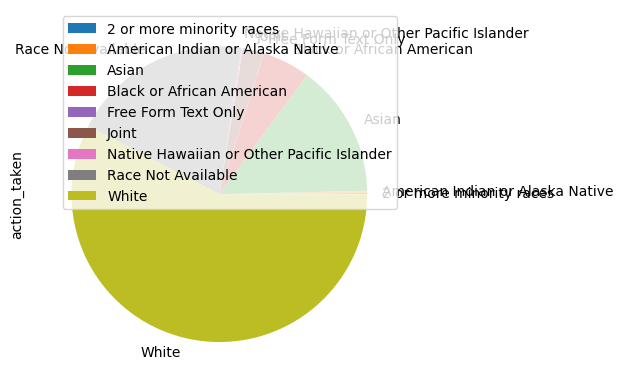

In [58]:
# Distribution of race in applicant
df_ny_by_race.plot(kind='pie',y='action_taken')

In [59]:
df_ny_approved = df_ny[df_ny['action_taken'].isin([1])]
num_approved = len(df_ny_approved)
print("Number of applicants approved: ", num_approved)

Number of applicants approved:  128726


In [60]:
df_ny_approved

,state_code,derived_loan_product_type,derived_dwelling_category,derived_race,derived_sex,action_taken,loan_purpose,business_or_commercial_purpose,loan_amount,combined_loan_to_value_ratio,interest_rate,loan_term,property_value,occupancy_type,income,debt_to_income_ratio,applicant_credit_score_type,applicant_race_1,denial_reason_1
1,NY,Conventional:First Lien,Single Family (1-4 Units):Site-Built,White,Male,1,1,2,95000,95.000,2.875,360,105000,1,35.0,39,2,5.0,10
2,NY,Conventional:First Lien,Single Family (1-4 Units):Site-Built,White,Male,1,1,2,95000,96.999,3.125,360,95000,1,24.0,38,3,5.0,10
4,NY,Conventional:First Lien,Single Family (1-4 Units):Site-Built,White,Male,1,1,2,105000,90.000,3.125,360,115000,1,80.0,<20%,1,5.0,10
9,NY,Conventional:First Lien,Single Family (1-4 Units):Site-Built,White,Joint,1,1,2,255000,80.000,3.000,360,315000,1,68.0,36,1,5.0,10
10,NY,Conventional:First Lien,Single Family (1-4 Units):Site-Built,White,Male,1,1,2,305000,89.820,3.000,360,335000,1,107.0,38,1,5.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26124546,NY,Conventional:First Lien,Single Family (1-4 Units):Site-Built,White,Joint,1,1,2,135000,80.000,3.250,360,165000.0,1,108.0,20%-<30%,2,5.0,10
26124547,NY,Conventional:First Lien,Single Family (1-4 Units):Site-Built,White,Female,1,1,2,165000,91.954,3.125,360,175000.0,1,44.0,30%-<36%,3,5.0,10
26124548,NY,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Race Not Available,Male,1,1,2,165000,97.000,2.875,360,165000.0,1,45.0,40,2,6.0,10
26124549,NY,Conventional:First Lien,Single Family (1-4 Units):Site-Built,White,Male,1,1,2,255000,99.953,3.125,360,265000.0,1,64.0,30%-<36%,1,5.0,10


In [61]:
df_ny_approved_by_race = df_ny_approved.groupby(by='derived_race').count()
df_ny_approved_by_race = df_ny_approved_by_race['action_taken']
df_ny_approved_by_race

derived_race
2 or more minority races                       166
American Indian or Alaska Native               294
Asian                                        19703
Black or African American                     6435
Free Form Text Only                             12
Joint                                         3233
Native Hawaiian or Other Pacific Islander      192
Race Not Available                           18204
White                                        80487
Name: action_taken, dtype: int64

In [62]:
num_approved_american_indian = df_ny_approved_by_race[1]
num_approved_asian = df_ny_approved_by_race[2]
num_approved_black = df_ny_approved_by_race[3]
#num_approved_notprovided= df_ny_approved_by_race[5]
num_approved_hawaiian = df_ny_approved_by_race[6]
#num_approved_notapplicable= df_ny_approved_by_race[4]
num_approved_white = df_ny_approved_by_race[8]

Text(0.5, 1.0, 'Approval distribution by race- Home Purchase Only')

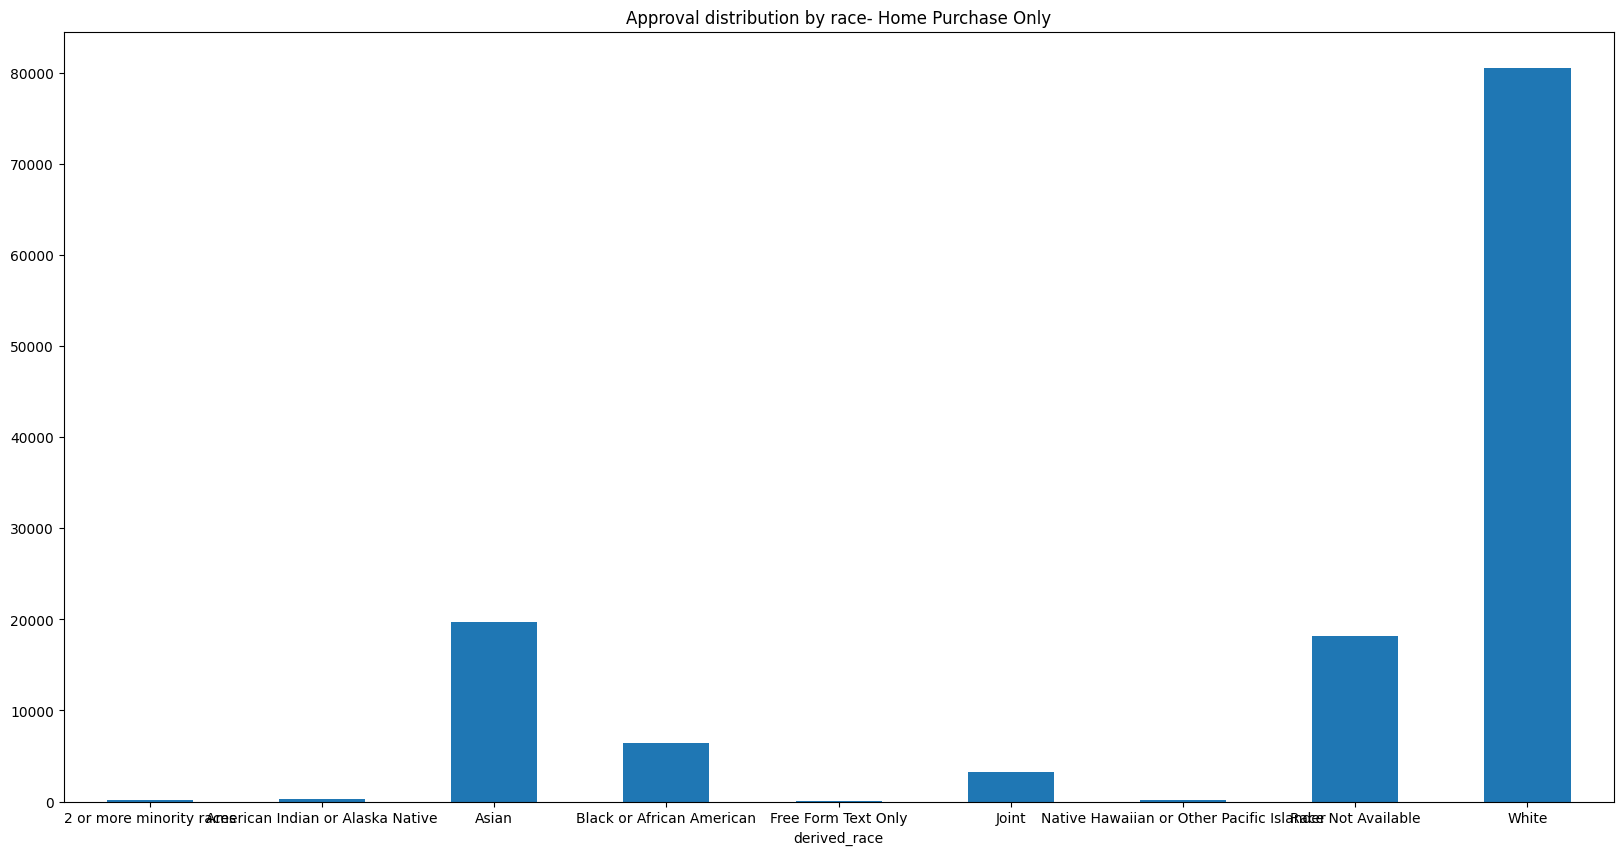

In [63]:
df_ny_approved_by_race.plot.bar(x="race", y="number of approvals",rot=0,figsize=(20,10))
plt.title("Approval distribution by race- Home Purchase Only")


In [64]:
approval_rate_american_indian = num_approved_american_indian/num_applied_american_indian 
approval_rate_asian = num_approved_asian/num_applied_asian
approval_rate_black = num_approved_black/num_applied_black
##approval_rate_notprovided = num_approved_notprovided/num_applied_notprovided
approval_rate_hawaiian = num_approved_hawaiian/num_applied_hawaiian 
#approval_rate_notapplicable = num_approved_notapplicable/num_applied_notapplicable
approval_rate_white = num_approved_white/num_applied_white 

print("Approval rate for American Indian/Alaska Native: ",approval_rate_american_indian )
print("Approval rate for Asian: ",approval_rate_asian   )
print("Approval rate for Black or African American: ",approval_rate_black  )
#print("Approval rate for Not provided: ",approval_rate_notprovided  )
print("Approval rate for Native Hawaiian or Other Pacific Islander: ",approval_rate_hawaiian )
#print("Approval rate for Not applicable: ",approval_rate_notapplicable )
print("Approval rate for Whites: ",approval_rate_white )


Approval rate for American Indian/Alaska Native:  0.6606741573033708
Approval rate for Asian:  0.719087591240876
Approval rate for Black or African American:  0.6538969616908851
Approval rate for Native Hawaiian or Other Pacific Islander:  0.6597938144329897
Approval rate for Whites:  0.7403281885244394


In [65]:
def confidence_test(p1,p2,n1,n2):
    lower_bound = (p1-p2)-(1.96)*(math.sqrt((p1*(1-p1)/n1)+(p2*(1-p2)/n2)))
    upper_bound = (p1-p2)+(1.96)*(math.sqrt((p1*(1-p1)/n1)+(p2*(1-p2)/n2)))
    if (lower_bound<0) and (upper_bound>0):
        print(lower_bound,"< p1-p2 (actual) <", upper_bound,"0 is in the interval. NO significant difference")
    else:
        print(lower_bound,"< p1-p2 (actual) <", upper_bound,"YES, There is a significant difference")


In [66]:
# American Indian vs everyone else
print("American Indian vs Asian")
confidence_test(approval_rate_american_indian,approval_rate_asian,num_applied_american_indian,num_applied_asian)
print("American Indian vs Black")
confidence_test(approval_rate_american_indian,approval_rate_black,num_applied_american_indian,num_applied_black)
print("American Indian vs Native Hawaiian")
confidence_test(approval_rate_american_indian,approval_rate_hawaiian,num_applied_american_indian,num_applied_hawaiian)
print("American Indian vs Whites")
confidence_test(approval_rate_american_indian,approval_rate_white,num_applied_american_indian,num_applied_white)

American Indian vs Asian
-0.10272660836010358 < p1-p2 (actual) < -0.014100259514906809 YES, There is a significant difference
American Indian vs Black
-0.038208159866744286 < p1-p2 (actual) < 0.05176255109171566 0 is in the interval. NO significant difference
American Indian vs Native Hawaiian
-0.06910962045072806 < p1-p2 (actual) < 0.07087030619149022 0 is in the interval. NO significant difference
American Indian vs Whites
-0.12372362420883318 < p1-p2 (actual) < -0.035584438233304067 YES, There is a significant difference


In [67]:
print("Asian vs Black")
confidence_test(approval_rate_asian,approval_rate_black,num_applied_asian,num_applied_black)
print("Asian vs Native Hawaiian")
confidence_test(approval_rate_asian,approval_rate_hawaiian,num_applied_asian,num_applied_hawaiian)
print("Asian vs Whites")
confidence_test(approval_rate_asian,approval_rate_white,num_applied_asian,num_applied_white)

Asian vs Black
0.05438935529893327 < p1-p2 (actual) < 0.0759919038010485 YES, There is a significant difference
Asian vs Native Hawaiian
0.004598436206112173 < p1-p2 (actual) < 0.11398911740966039 YES, There is a significant difference
Asian vs Whites
-0.027166333015192164 < p1-p2 (actual) < -0.015314861551934681 YES, There is a significant difference


In [68]:
print("Black vs Native Hawaiian")
confidence_test(approval_rate_black,approval_rate_hawaiian,num_applied_black,num_applied_hawaiian)
print("Black vs White")
confidence_test(approval_rate_black,approval_rate_white,num_applied_black,num_applied_white)

Black vs Native Hawaiian
-0.061138187480949735 < p1-p2 (actual) < 0.04934448199674052 0 is in the interval. NO significant difference
Black vs White
-0.09618515548544426 < p1-p2 (actual) < -0.07667729818166436 YES, There is a significant difference


In [69]:
print("Native Hawaiian vs White")
confidence_test(approval_rate_hawaiian,approval_rate_white,num_applied_hawaiian,num_applied_white)

Native Hawaiian vs White
-0.1350325564670453 < p1-p2 (actual) < -0.026036191715854105 YES, There is a significant difference


Exclude not applicable and not provided    
7 yes in 2017 datasets   
7 yes in 2021 datasets   

Why the disparities?   

When evaluating mortgage applications, banks typically consider several factors, such as:

Income: Both customers have an annual income of $180,000, which is a positive factor in their favor.

Loan-to-value ratio (LTV): Both customers have an LTV ratio of 90%, which means they are asking for a mortgage that covers 90% of the home's value. This is a relatively high LTV, which may indicate a higher risk for the lender. Banks may require mortgage insurance for loans with high LTV ratios.

Credit score: The credit scores of both customers are not provided, but they play a crucial role in the decision-making process. A good credit score indicates a lower risk of default.

Debt-to-income ratio (DTI): This ratio compares the total monthly debt payments (including the prospective mortgage payment) to the borrower's gross monthly income. A lower DTI is generally preferred.

Employment history and stability: A stable and consistent employment history can be a positive factor in the decision-making process.

Down payment: The size of the down payment can influence the lender's decision. A larger down payment may result in better loan terms and a lower interest rate.

Other financial obligations and assets: Banks may also consider other financial commitments and the applicant's assets to assess their overall financial health and ability to repay the loan.





In [70]:
#df_ny_approved[df_ny_approved['derived_race'] == 'White']

In [71]:
df_approved_american_indian = df_ny_approved[df_ny_approved['derived_race']=='American Indian or Alaska Native']
df_approved_asian = df_ny_approved[df_ny_approved['derived_race']=='Asian']
df_approved_black = df_ny_approved[df_ny_approved['derived_race']=='Black or African American']
df_approved_hawaiian = df_ny_approved[df_ny_approved['derived_race']=='Native Hawaiian or Other Pacific Islander']
df_approved_white = df_ny_approved[df_ny_approved['derived_race']=='White']

avg_income_american_indian = df_approved_american_indian['income'].mean()
avg_income_asian = df_approved_asian['income'].mean()
avg_income_black = df_approved_black['income'].mean()
avg_income_hawaiian = df_approved_hawaiian['income'].mean()
avg_income_white = df_approved_white['income'].mean()
print("Average income of approved american indian: ", avg_income_american_indian*1000)
print("Average income of approved asian: ", avg_income_asian*1000)
print("Average income of approved black: ", avg_income_black*1000)
print("Average income of approved hawaiian: ", avg_income_hawaiian*1000)
print("Average income of approved white: ", avg_income_white*1000)

Average income of approved american indian:  120228.66894197951
Average income of approved asian:  165134.40741558158
Average income of approved black:  123230.46752431754
Average income of approved hawaiian:  112386.2433862434
Average income of approved white:  170385.38172463365


In [72]:
# Average loan amount

avg_loan_american_indian = df_approved_american_indian['loan_amount'].mean()
avg_loan_asian = df_approved_asian['loan_amount'].mean()
avg_loan_black = df_approved_black['loan_amount'].mean()
avg_loan_hawaiian = df_approved_hawaiian['loan_amount'].mean()
avg_loan_white = df_approved_white['loan_amount'].mean()
print("Average loan amount of approved american indian: ", avg_loan_american_indian)
print("Average loan amount of approved asian: ", avg_loan_asian)
print("Average loan amount of approved black:", avg_loan_black)
print("Average loan amount of approved hawaiian: ", avg_loan_hawaiian)
print("Average loan amount of approved white: ", avg_loan_white)

Average loan amount of approved american indian:  357244.89795918367
Average loan amount of approved asian:  538349.2361569304
Average loan amount of approved black: 380247.86324786325
Average loan amount of approved hawaiian:  403020.8333333333
Average loan amount of approved white:  434737.47313230706


In [73]:
#df_approved_american_indian.dtypes

In [74]:
#df['purchase'].astype(str).astype(int)

In [75]:
# Average combined loan to value ratio
# an assessment of lending risk 
# Typically, loan assessments with high LTV ratios are considered higher-risk loans. 
# Therefore, if the mortgage is approved, the loan has a higher interest rate.
avg_ltv_american_indian = df_approved_american_indian['combined_loan_to_value_ratio'].mean()
avg_ltv_asian = df_approved_asian['combined_loan_to_value_ratio'].mean()
avg_ltv_black = df_approved_black['combined_loan_to_value_ratio'].mean()
avg_ltv_hawaiian = df_approved_hawaiian['combined_loan_to_value_ratio'].mean()
avg_ltv_white = df_approved_white['combined_loan_to_value_ratio'].mean()

print("Average loan to value ratio of approved american indian: ", avg_ltv_american_indian)
print("Average loan to value ratio of approved asian: ", avg_ltv_asian)
print("Average loan to value ratio of approved black:", avg_ltv_black)
print("Average loan to value ratio of approved hawaiian: ", avg_ltv_hawaiian)
print("Average loan to value ratio of approved white: ", avg_ltv_white)

Average loan to value ratio of approved american indian:  83.09327210884354
Average loan to value ratio of approved asian:  72.31246830470577
Average loan to value ratio of approved black: 87.97133942367601
Average loan to value ratio of approved hawaiian:  81.82989583333334
Average loan to value ratio of approved white:  80.74517263234101


In [76]:
# Average interest rate by race

avg_ir_american_indian = df_approved_american_indian['interest_rate'].mean()
avg_ir_asian = df_approved_asian['interest_rate'].mean()
avg_ir_black = df_approved_black['interest_rate'].mean()
avg_ir_hawaiian = df_approved_hawaiian['interest_rate'].mean()
avg_ir_white = df_approved_white['interest_rate'].mean()

print("Average interest rate of approved american indian: ", avg_ir_american_indian)
print("Average interest rate of approved asian: ", avg_ir_asian)
print("Average interest rate of approved black:", avg_ir_black)
print("Average interest rate of approved hawaiian: ", avg_ir_hawaiian)
print("Average interest rate of approved white: ", avg_ir_white)

Average interest rate of approved american indian:  3.0764455782312927
Average interest rate of approved asian:  3.1146934476983206
Average interest rate of approved black: 3.0469275722723035
Average interest rate of approved hawaiian:  3.116364583333333
Average interest rate of approved white:  3.0099602261431415


pairplot by race

ML part:   
Test whether race is an important factor or not, if we add race does it improve accuracy?   
Principle component analysis, find the most interesting weighted factor    

Or race as a classification variable


feed the output function into random forest/decision tree

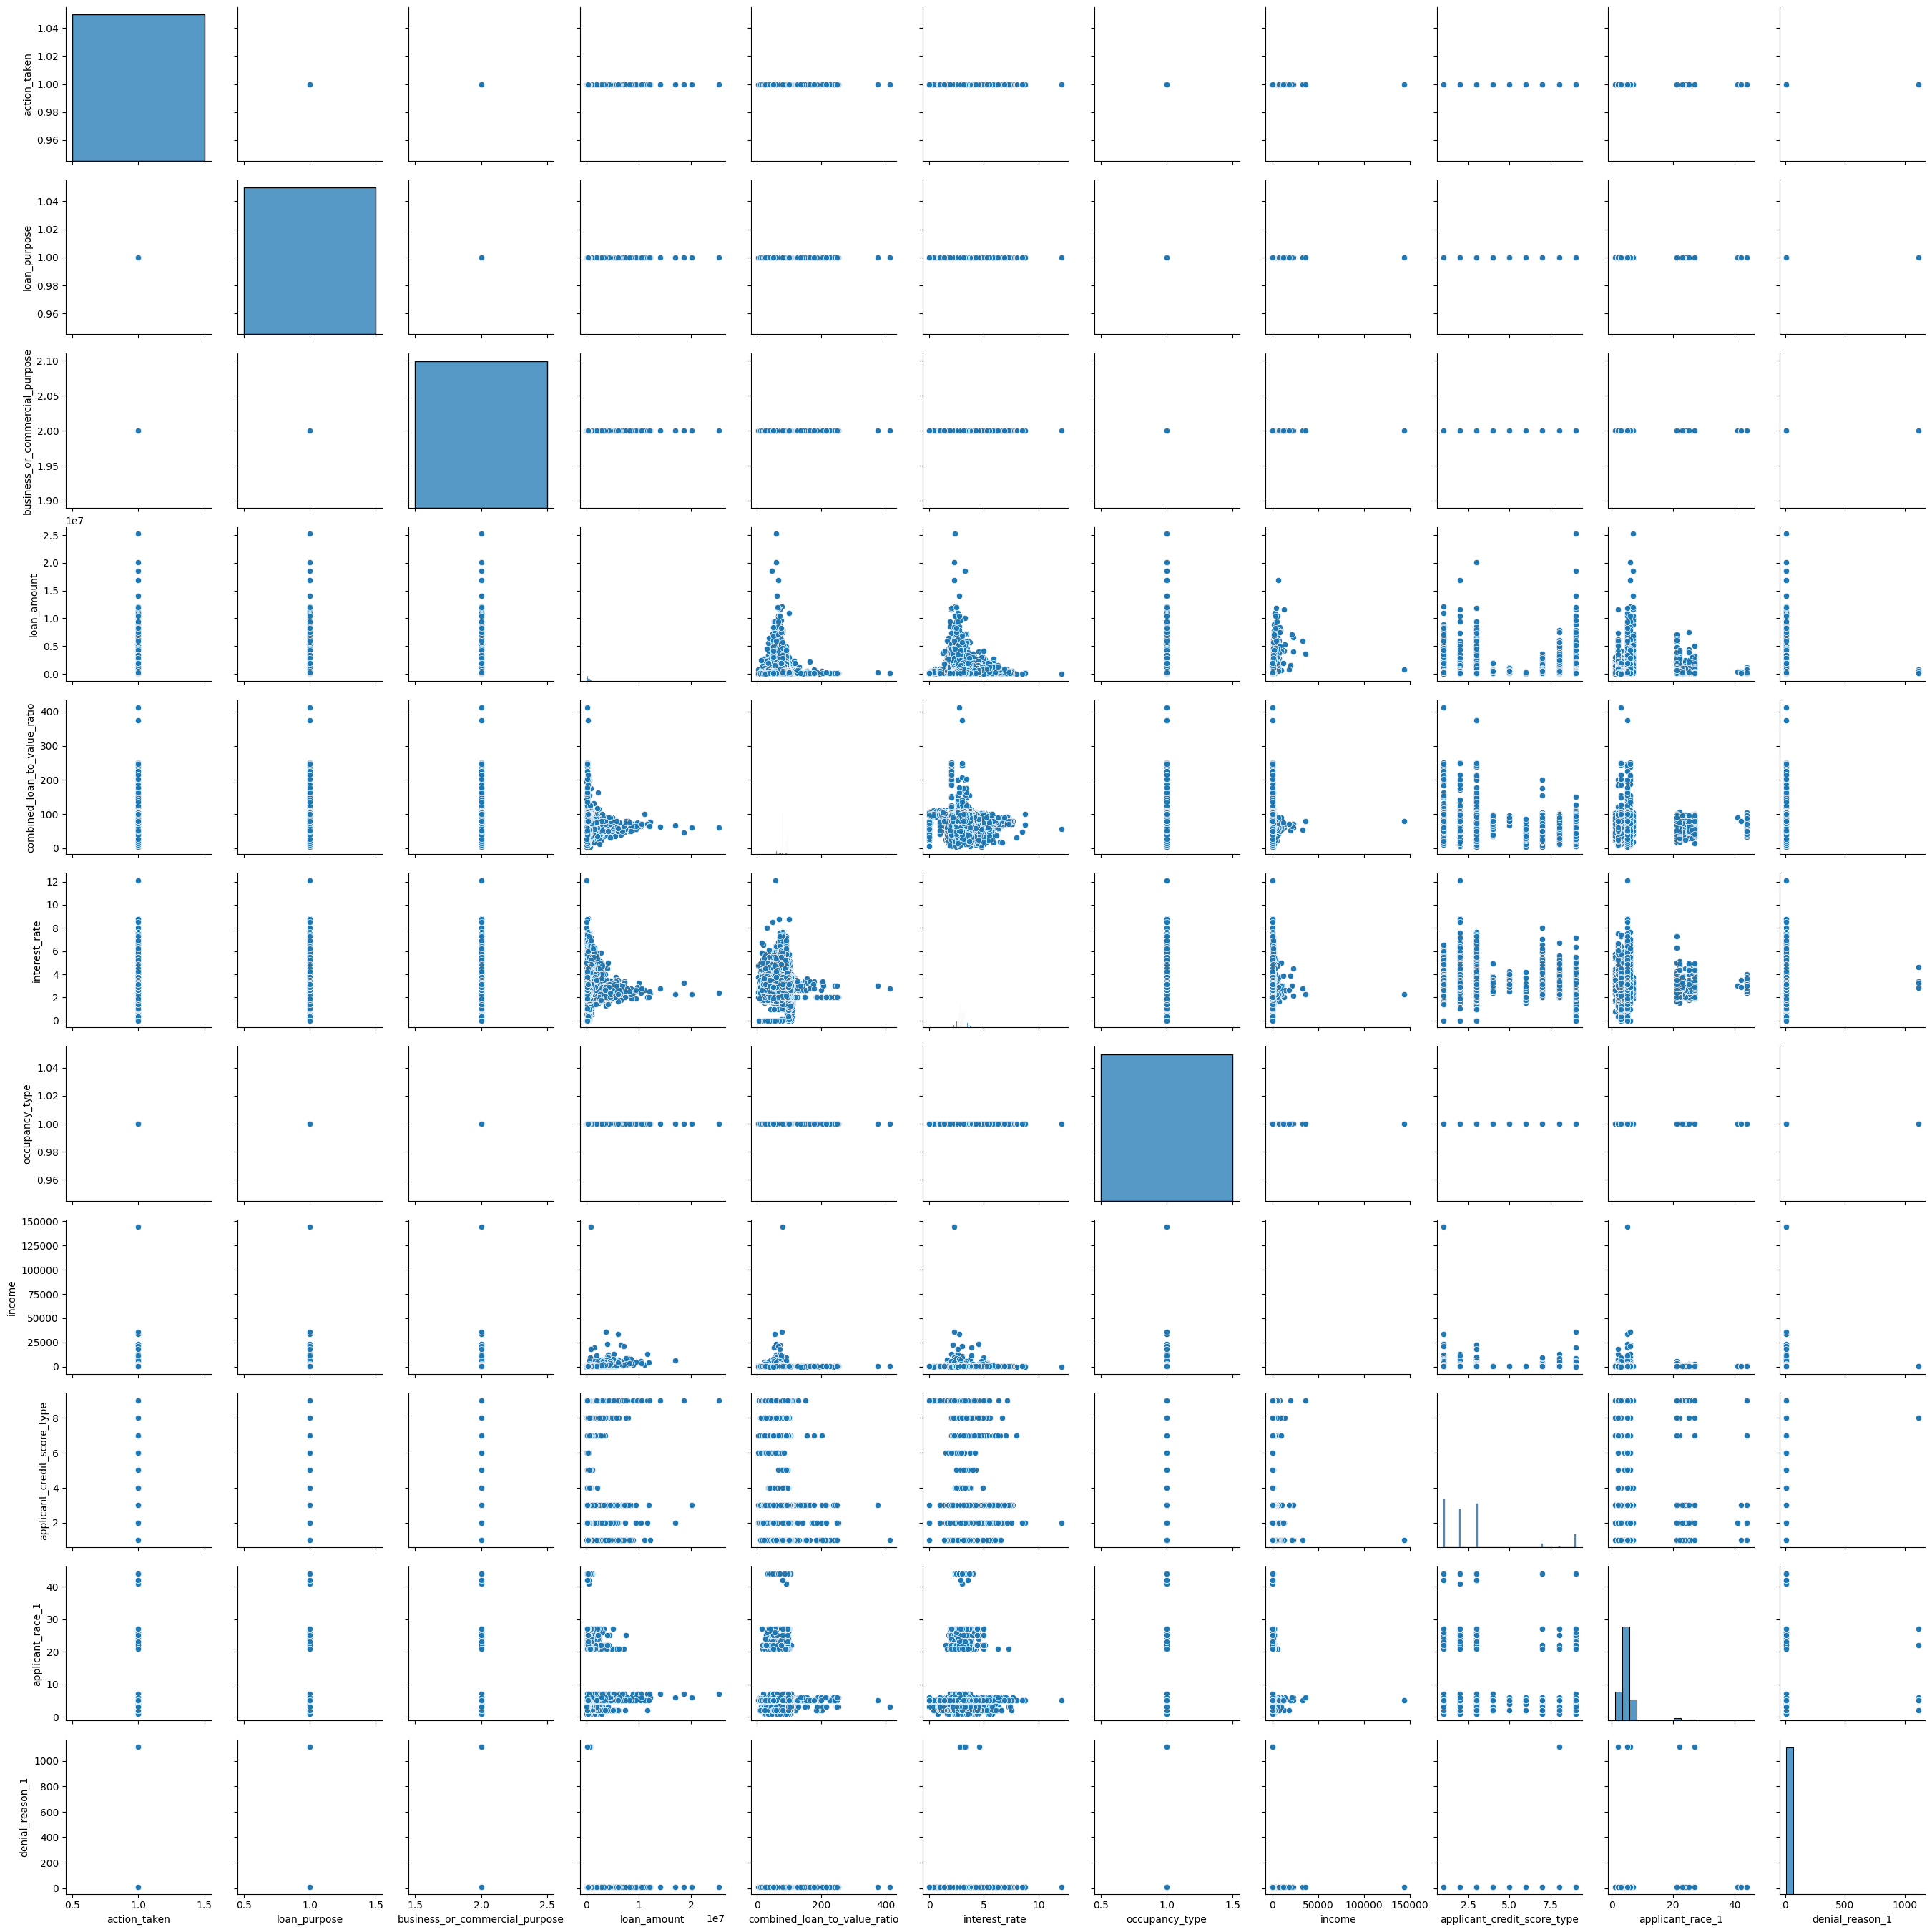

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
 
sns.pairplot(df_ny_approved)

In [78]:
cols_to_plot = ['interest_rate', 'combined_loan_to_value_ratio', 'loan_amount', 'income']

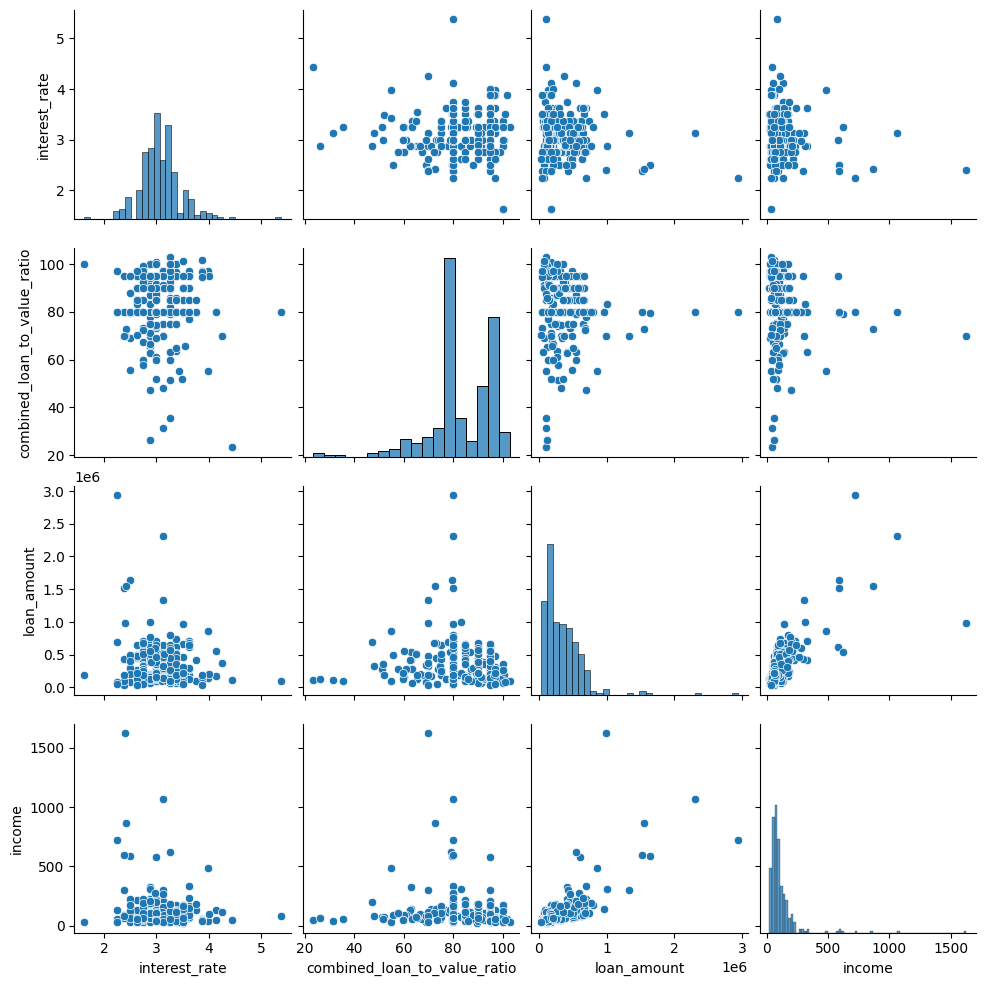

In [79]:
# pairplot of approved American Indian
sns.pairplot(df_approved_american_indian[cols_to_plot])

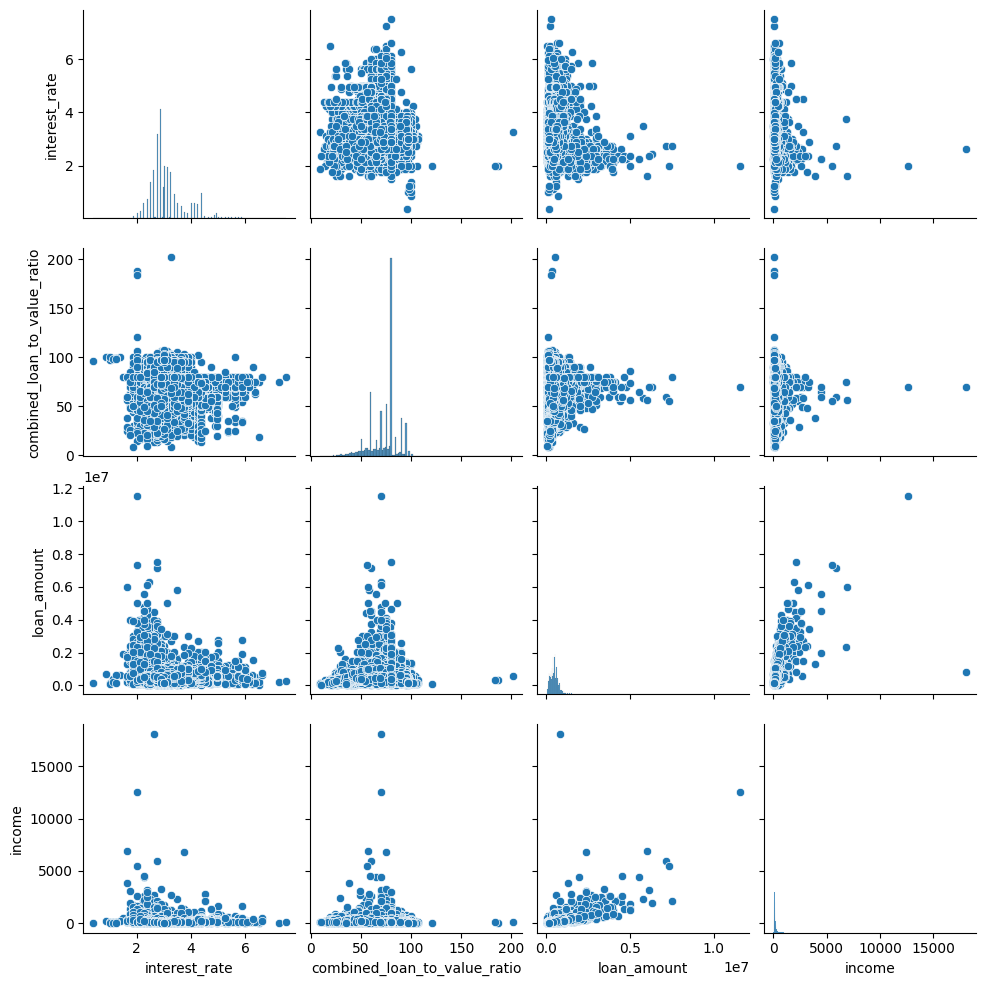

In [80]:
sns.pairplot(df_approved_asian[cols_to_plot])

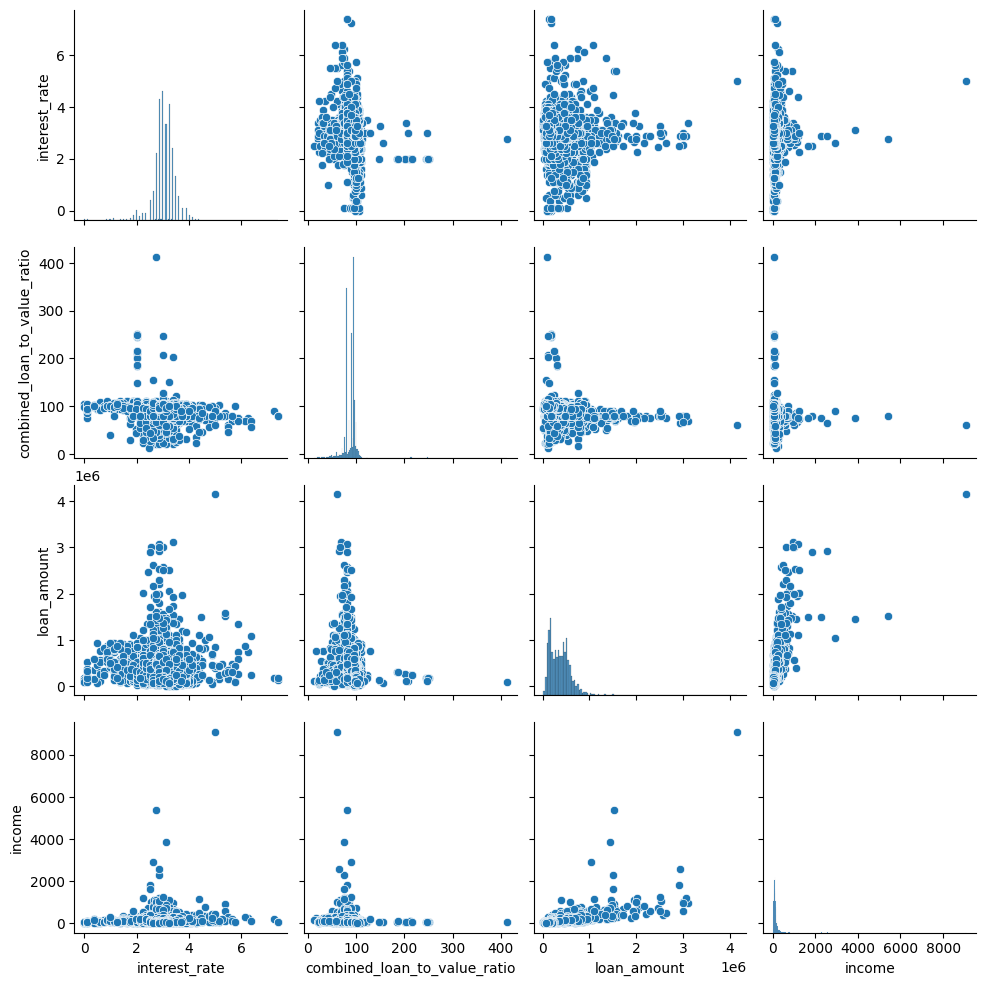

In [81]:
sns.pairplot(df_approved_black[cols_to_plot])

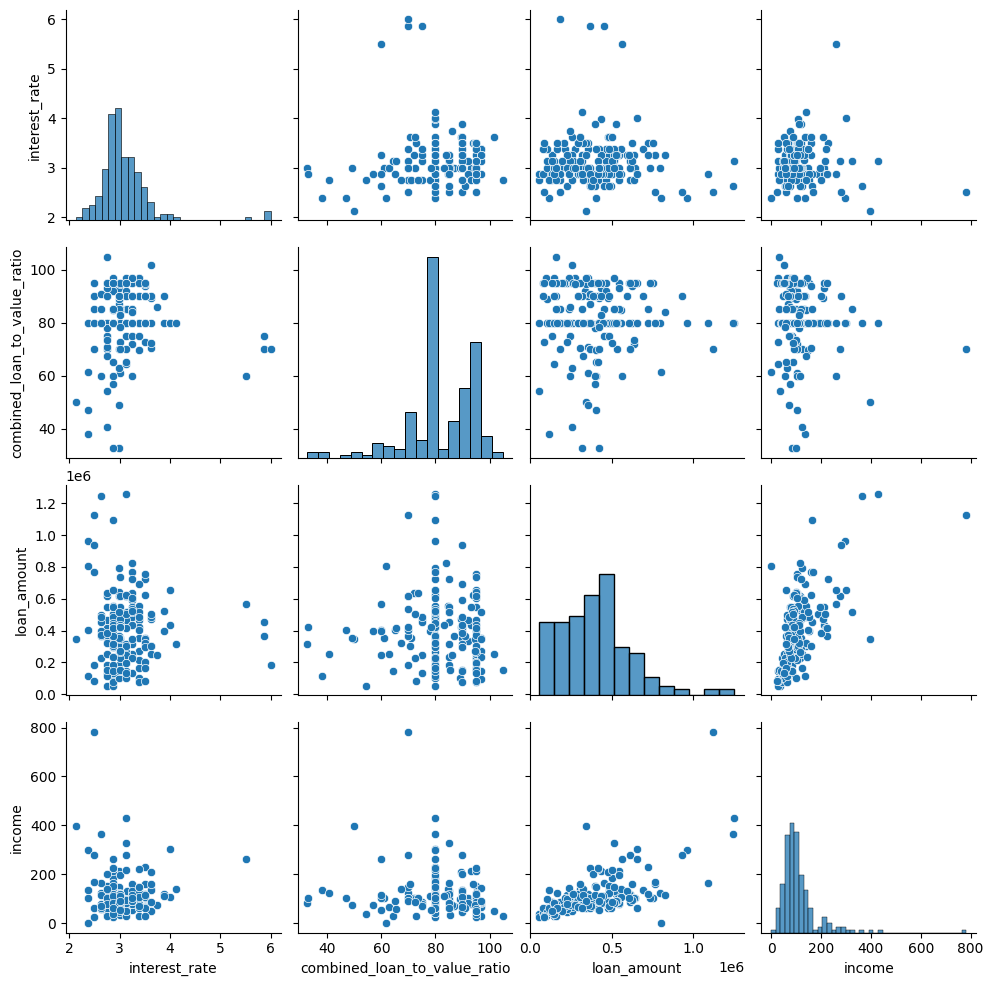

In [82]:
sns.pairplot(df_approved_hawaiian[cols_to_plot])

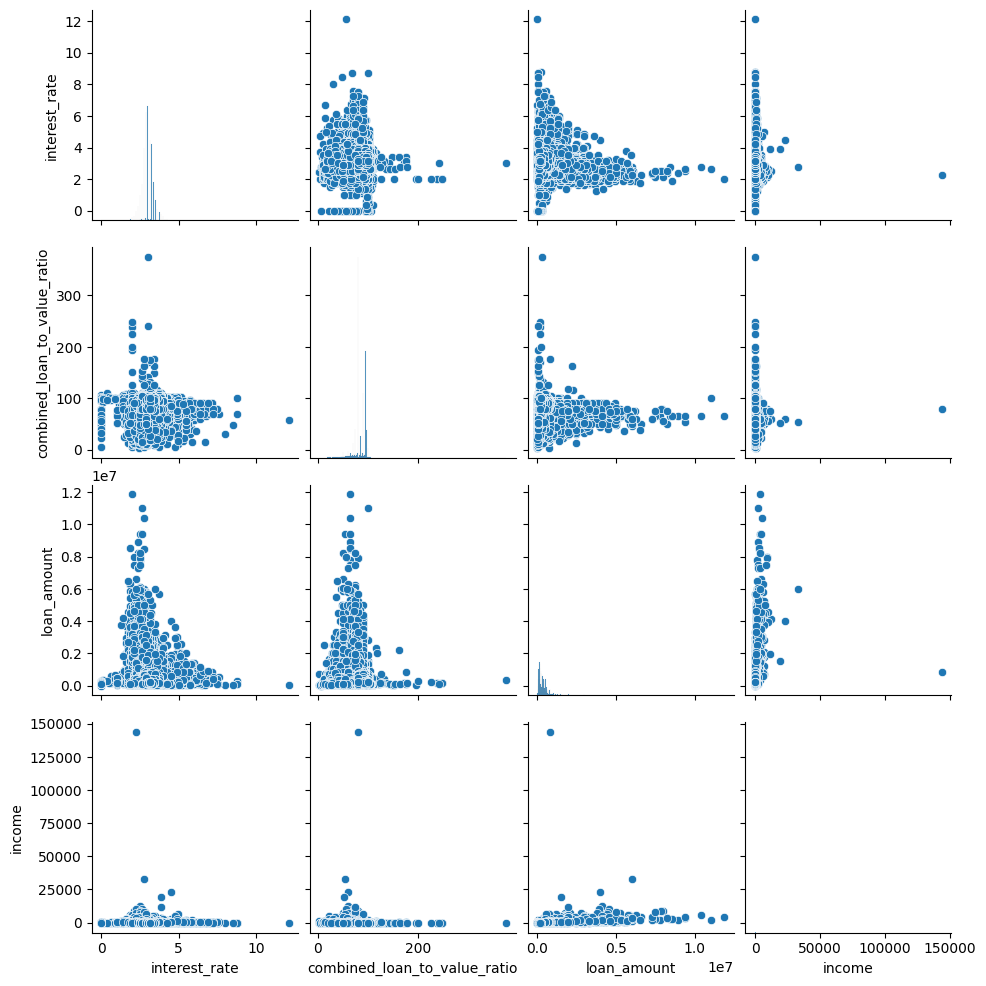

In [83]:
sns.pairplot(df_approved_white[cols_to_plot])

In [84]:
# What type of credit scores were used in each race?
df_approved_american_indian.groupby(by='applicant_credit_score_type').count()

,state_code,derived_loan_product_type,derived_dwelling_category,derived_race,derived_sex,action_taken,loan_purpose,business_or_commercial_purpose,loan_amount,combined_loan_to_value_ratio,interest_rate,loan_term,property_value,occupancy_type,income,debt_to_income_ratio,applicant_race_1,denial_reason_1
applicant_credit_score_type,,,,,,,,,,,,,,,,,,
1,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93
2,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88
3,94,94,94,94,94,94,94,94,94,94,94,94,94,94,93,94,94,94
7,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
8,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
9,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10


In [85]:
df_approved_asian.groupby(by='applicant_credit_score_type').count()

,state_code,derived_loan_product_type,derived_dwelling_category,derived_race,derived_sex,action_taken,loan_purpose,business_or_commercial_purpose,loan_amount,combined_loan_to_value_ratio,interest_rate,loan_term,property_value,occupancy_type,income,debt_to_income_ratio,applicant_race_1,denial_reason_1
applicant_credit_score_type,,,,,,,,,,,,,,,,,,
1,6366,6366,6366,6366,6366,6366,6366,6366,6366,6351,6366,6366,6357,6366,6176,6267,6366,6366
2,5089,5089,5089,5089,5089,5089,5089,5089,5089,5087,5089,5089,5087,5089,4948,5020,5089,5089
3,5523,5523,5523,5523,5523,5523,5523,5523,5523,5519,5523,5523,5521,5523,5325,5420,5523,5523
4,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7,556,556,556,556,556,556,556,556,556,556,556,556,556,556,555,556,556,556
8,44,44,44,44,44,44,44,44,44,41,44,44,44,44,44,44,44,44
9,2108,2108,2108,2108,2108,2108,2108,2108,2108,2107,2108,2108,2108,2108,1059,1062,2108,2108


In [86]:
df_approved_black.groupby(by='applicant_credit_score_type').count()

,state_code,derived_loan_product_type,derived_dwelling_category,derived_race,derived_sex,action_taken,loan_purpose,business_or_commercial_purpose,loan_amount,combined_loan_to_value_ratio,interest_rate,loan_term,property_value,occupancy_type,income,debt_to_income_ratio,applicant_race_1,denial_reason_1
applicant_credit_score_type,,,,,,,,,,,,,,,,,,
1,2025,2025,2025,2025,2025,2025,2025,2025,2025,2020,2025,2025,2023,2025,2006,2018,2025,2025
2,1686,1686,1686,1686,1686,1686,1686,1686,1686,1681,1685,1686,1683,1686,1663,1682,1686,1686
3,1893,1893,1893,1893,1893,1893,1893,1893,1893,1890,1893,1893,1891,1893,1878,1890,1893,1893
4,12,12,12,12,12,12,12,12,12,11,12,12,12,12,12,12,12,12
7,265,265,265,265,265,265,265,265,265,265,265,265,265,265,265,265,265,265
8,18,18,18,18,18,18,18,18,18,18,18,17,18,18,18,18,18,18
9,536,536,536,536,536,536,536,536,536,535,536,536,536,536,532,532,536,536


In [87]:
df_approved_hawaiian.groupby(by='applicant_credit_score_type').count()

,state_code,derived_loan_product_type,derived_dwelling_category,derived_race,derived_sex,action_taken,loan_purpose,business_or_commercial_purpose,loan_amount,combined_loan_to_value_ratio,interest_rate,loan_term,property_value,occupancy_type,income,debt_to_income_ratio,applicant_race_1,denial_reason_1
applicant_credit_score_type,,,,,,,,,,,,,,,,,,
1,48,48,48,48,48,48,48,48,48,48,48,48,48,48,47,47,48,48
2,56,56,56,56,56,56,56,56,56,56,56,56,56,56,55,55,56,56
3,68,68,68,68,68,68,68,68,68,68,68,68,68,68,67,67,68,68
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9


In [88]:
df_approved_white.groupby(by='applicant_credit_score_type').count()

,state_code,derived_loan_product_type,derived_dwelling_category,derived_race,derived_sex,action_taken,loan_purpose,business_or_commercial_purpose,loan_amount,combined_loan_to_value_ratio,interest_rate,loan_term,property_value,occupancy_type,income,debt_to_income_ratio,applicant_race_1,denial_reason_1
applicant_credit_score_type,,,,,,,,,,,,,,,,,,
1,26431,26431,26431,26431,26431,26431,26431,26431,26431,26298,26430,26431,26377,26431,26027,26349,26431,26431
2,20910,20910,20910,20910,20910,20910,20910,20910,20910,20807,20907,20910,20880,20910,20591,20828,20910,20910
3,24119,24119,24119,24119,24119,24119,24119,24119,24119,24015,24119,24119,24088,24119,23732,24033,24119,24119
4,100,100,100,100,100,100,100,100,100,100,100,100,100,100,99,100,100,100
5,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
6,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28
7,1677,1677,1677,1677,1677,1677,1677,1677,1677,1677,1677,1676,1677,1677,1673,1675,1677,1677
8,485,485,485,485,485,485,485,485,485,481,482,466,485,485,482,484,485,485
9,6727,6727,6727,6727,6727,6727,6727,6727,6727,6699,6727,6726,6714,6727,6656,6692,6727,6727
